# **Final Project - Visual Analytics**

## A visual music recommender system powere by Spotify data

### Members: 
- Marina Castellano Blanco NIA 242409
- Júlia Othats-Dalès Gibert NIA 254435

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

### Data Loading 

In [3]:
data1 = pd.read_csv('data/spotify_data clean.csv')
data2 = pd.read_csv('data/track_data_final.csv')

# data1: duration is in minutes → convert to seconds
if 'track_duration_min' in data1.columns:
    data1['track_duration_sec'] = data1['track_duration_min'] * 60
    data1['track_duration_sec'] = data1['track_duration_sec'].round().astype(int)
    data1.drop(columns=['track_duration_min'], inplace=True)

# data2: duration is in milliseconds → convert to seconds
if 'track_duration_ms' in data2.columns:
    data2['track_duration_sec'] = (data2['track_duration_ms'] / 1000).round().astype(int)
    data2.drop(columns=['track_duration_ms'], inplace=True)

data = pd.concat([data1, data2], axis=0).reset_index(drop=True)

In [4]:
display(data1.head())
display(data2.head())

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_sec
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,93
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,184
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,153
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,101
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,143


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_sec
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation,213
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single,159
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album,225
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album,158
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album,267


In [5]:
data.head()
data['main_artist'] = data['artist_name'].str.extract(r'^(.*?)(?:\s*\(?\s*(?:ft\.|feat\.|featuring)\s+.*)?$', flags=re.IGNORECASE)[0].str.strip()

In [6]:
artist_meta = pd.read_csv("data/top10k-spotify-artist-metadata.csv")
artist_meta = artist_meta.rename(columns={"artist": "artist_name"})

# Clean spaces and lowercase to improve matching
artist_meta['artist_name'] = artist_meta['artist_name'].str.strip().str.lower()
data['main_artist_clean'] = data['main_artist'].str.strip().str.lower()


artist_meta = artist_meta.rename(columns={"artist": "artist_name"})
data = data.merge(
    artist_meta[['artist_name', 'country']],
    left_on='main_artist_clean',
    right_on='artist_name',
    how='left'
)

# Drop helper columns if you want
data = data.drop(columns=['main_artist_clean', 'artist_name_y'])
data = data.rename(columns={'artist_name_x': 'artist_name'})



### Basic Statistics

In [7]:
data["album_release_date"] = pd.to_datetime(data["album_release_date"], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17504 entries, 0 to 17503
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_id            17504 non-null  object        
 1   track_name          17502 non-null  object        
 2   track_number        17504 non-null  int64         
 3   track_popularity    17504 non-null  int64         
 4   explicit            17504 non-null  bool          
 5   artist_name         17497 non-null  object        
 6   artist_popularity   17500 non-null  float64       
 7   artist_followers    17500 non-null  float64       
 8   artist_genres       14122 non-null  object        
 9   album_id            17504 non-null  object        
 10  album_name          17502 non-null  object        
 11  album_release_date  17303 non-null  datetime64[ns]
 12  album_total_tracks  17504 non-null  int64         
 13  album_type          17504 non-null  object    

In [8]:
data.describe()


,track_number,track_popularity,artist_popularity,artist_followers,album_release_date,album_total_tracks,track_duration_sec
count,17504.000000,17504.000000,17500.000000,1.750000e+04,17303,17504.000000,17504.000000
mean,5.765482,52.300674,69.892800,2.408547e+07,2015-10-03 09:26:19.772293888,13.807701,209.900651
min,1.000000,0.000000,0.000000,0.000000e+00,1952-09-12 00:00:00,1.000000,0.000000
25%,1.000000,39.000000,60.000000,5.083488e+05,2012-06-29 00:00:00,6.000000,173.000000
50%,4.000000,58.000000,74.000000,6.129109e+06,2018-03-16 00:00:00,13.000000,207.000000
75%,9.000000,71.000000,84.000000,2.830569e+07,2022-07-21 00:00:00,17.000000,240.000000
max,102.000000,100.000000,100.000000,1.455421e+08,2025-10-31 00:00:00,181.000000,811.000000
std,6.029363,23.929932,19.545699,3.795676e+07,NaN,11.814572,63.251397


In [9]:
# To get descriptive statistics for categorical columns
data.describe(include="O")

,track_id,track_name,artist_name,artist_genres,album_id,album_name,album_type,main_artist,country
count,17504,17502,17497,14122,17504,17502,17504,17497,9717
unique,8778,7581,2549,1313,5317,4915,3,2548,34
top,4qX18Am6dJZg0ovgddL7w6,Home,Taylor Swift,[],3FFGbUutKWN1c4f0CJR4Uh,Nevermind (Super Deluxe Edition),album,Taylor Swift,US
freq,6,18,654,4509,140,140,12010,654,5925


In [10]:
data.isna().sum()

track_id                 0
track_name               2
track_number             0
track_popularity         0
explicit                 0
artist_name              7
artist_popularity        4
artist_followers         4
artist_genres         3382
album_id                 0
album_name               2
album_release_date     201
album_total_tracks       0
album_type               0
track_duration_sec       0
main_artist              7
country               7787
dtype: int64

In [11]:
df = data.dropna(subset=['artist_name', 'artist_popularity', 'track_name', 'artist_followers', 'album_name', 'album_release_date'])
df.isna().sum()

track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              0
artist_popularity        0
artist_followers         0
artist_genres         3375
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_sec       0
main_artist              0
country               7676
dtype: int64

### Preprocessing

In [12]:
# Count duplicate songs and keep only one of them
print(f"Dropping {df.duplicated(subset=['track_name', 'artist_name']).sum()} duplicate songs.")

df = df.drop_duplicates(subset=['track_name', 'artist_name'], keep='last')

Dropping 9260 duplicate songs.


In [13]:
# Export cleaned data
df.to_csv('data/spotify_data_final.csv', index=False)

### EDA

In [19]:
df[df['track_popularity'] == 100]

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_sec,main_artist,country
15804,53iuhJlwXhSER5J2IYYv1W,The Fate of Ophelia,1,100,False,Taylor Swift,100.0,145489371.0,[],4a6NzYL1YHRUgx9e3YZI6I,The Life of a Showgirl,2025-10-03,12,album,226,Taylor Swift,US


In [20]:
df[df['track_popularity'] == 0].head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_sec,main_artist,country
4114,5QozZMQY8pD7xRb0BMf2O7,vacation bible school,3,0,True,Ayesha Erotica,0.0,127548.0,NaN,20Jp8MaLDkKBUoWtOP70im,horny.4u,2018-06-30,7,album,292,Ayesha Erotica,NaN
4173,6D7GVQWJ09EBxQlZqPgGIo,The Punisher Main Theme (From The Punisher Net...,4,0,False,Beyond The Guitar,35.0,24505.0,NaN,07w3dclT3ZkZSTBhYlqW88,"Guitar Covers, Vol. 2",2018-06-01,12,album,134,Beyond The Guitar,NaN
4176,2y13ifLsxsY1d5TiqX9KfS,Misty Mountains (From The Hobbit: An Unexpecte...,12,0,False,Beyond The Guitar,35.0,24497.0,NaN,07w3dclT3ZkZSTBhYlqW88,"Guitar Covers, Vol. 2",2018-06-01,12,album,192,Beyond The Guitar,NaN
4244,1AZFoli0qTFmgsnT5pZX9I,Smile for You (From Sword Art Online -Ordinal ...,24,0,False,daigoro789,50.0,38492.0,NaN,46TIniSnvWc8fLVzY7H0kB,Sword Art Online Piano Collections,2018-04-17,24,album,194,daigoro789,NaN
4245,2OJiL2xsAFEucNu8pFXWVd,"A Tender Feeling (From Sword Art Online"")""",8,0,False,daigoro789,50.0,38492.0,NaN,46TIniSnvWc8fLVzY7H0kB,Sword Art Online Piano Collections,2018-04-17,24,album,121,daigoro789,NaN


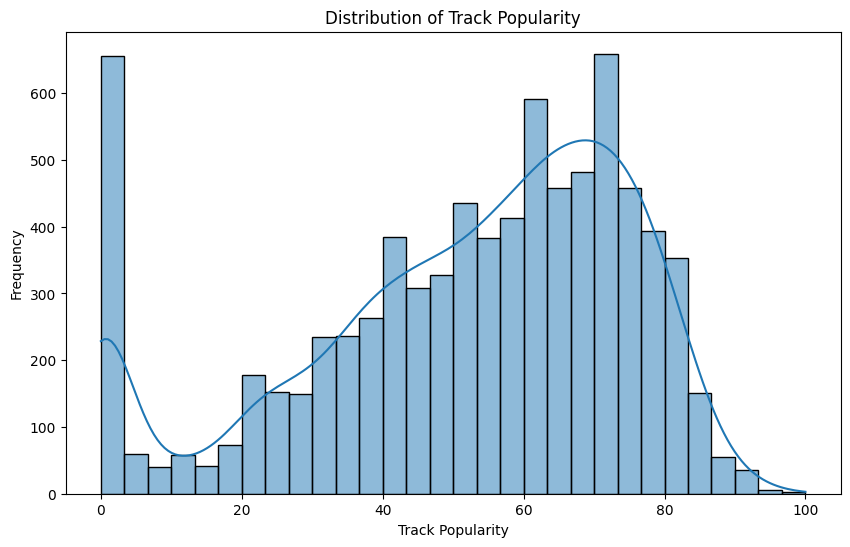

In [22]:
# Show the popularity distribution of tracks
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

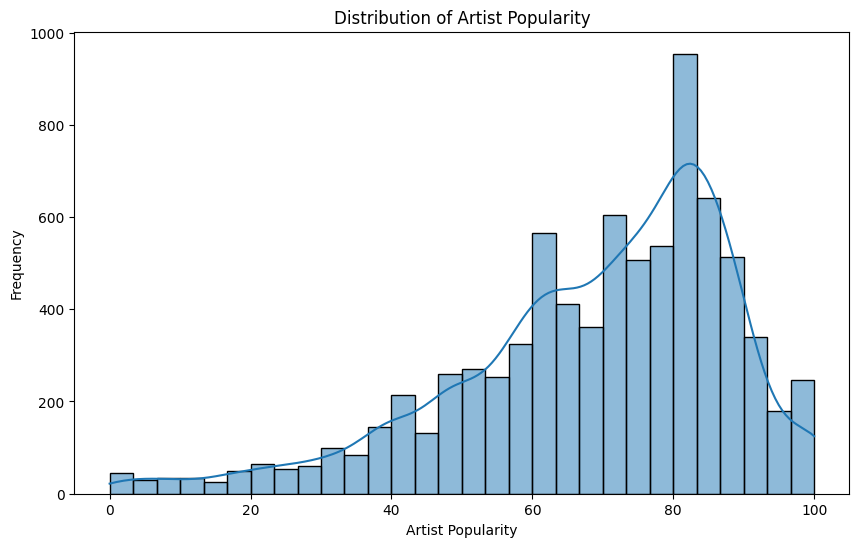

In [ ]:
# Show the popularity distribution of artist
plt.figure(figsize=(10, 6))
sns.histplot(df['artist_popularity'], bins=30, kde=True)
plt.title('Distribution of Artist Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Frequency')
plt.show()

In [24]:
top10_tracks = df.sort_values(by='track_popularity', ascending=False).head(10)
top10_tracks[['track_name', 'artist_name', 'track_popularity']]

unique_artists = df.drop_duplicates(subset='artist_name', keep='first')
top10_artists = unique_artists.sort_values(by='artist_popularity', ascending=False).head(10)
top10_artists[['artist_name', 'artist_popularity', 'artist_followers']]

print("Top 10 Tracks by Popularity:")
display(top10_tracks)
print("\nTop 10 Artists by Popularity:")  
display(top10_artists)

Top 10 Tracks by Popularity:


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_sec,main_artist,country
15804,53iuhJlwXhSER5J2IYYv1W,The Fate of Ophelia,1,100,False,Taylor Swift,100.0,145489371.0,[],4a6NzYL1YHRUgx9e3YZI6I,The Life of a Showgirl,2025-10-03,12,album,226,Taylor Swift,US
13066,1CPZ5BxNNd0n0nF4Orb9JS,Golden,4,99,False,HUNTR/X,87.0,3551538.0,['k-pop'],14JkAa6IiFaOh5s0nMyMU9,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20,12,album,195,HUNTR/X,NaN
14195,3yWuTOYDztXjZxdE2cIRUa,Opalite,3,97,False,Taylor Swift,100.0,145443567.0,[],4a6NzYL1YHRUgx9e3YZI6I,The Life of a Showgirl,2025-10-03,12,album,235,Taylor Swift,US
15157,1jgTiNob5cVyXeJ3WgX5bL,Elizabeth Taylor,2,95,False,Taylor Swift,100.0,145489371.0,[],4a6NzYL1YHRUgx9e3YZI6I,The Life of a Showgirl,2025-10-03,12,album,208,Taylor Swift,US
12325,1qbmS6ep2hbBRaEZFpn7BX,Man I Need,1,95,False,Olivia Dean,88.0,1499215.0,['pop soul'],0Bv6OJO0L5gcf20DMww54a,Man I Need,2025-08-15,3,single,184,Olivia Dean,NaN
10060,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,4,94,False,Billie Eilish,90.0,118692183.0,[],7aJuG4TFXa2hmE4z1yxc3n,HIT ME HARD AND SOFT,2024-05-17,10,album,210,Billie Eilish,US
17383,03bTIHJElXZ0O0jqOQvAbY,Father Figure,4,94,True,Taylor Swift,100.0,145542136.0,[],4a6NzYL1YHRUgx9e3YZI6I,The Life of a Showgirl,2025-10-03,12,album,213,Taylor Swift,US
11811,02sy7FAs8dkDNYsHp4Ul3f,Soda Pop,3,94,False,Saja Boys,80.0,2234812.0,[],14JkAa6IiFaOh5s0nMyMU9,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20,12,album,151,Saja Boys,NaN
14749,5ylJtmaWPJ33cW3En7WOu0,Wood,9,93,True,Taylor Swift,100.0,145443567.0,[],4a6NzYL1YHRUgx9e3YZI6I,The Life of a Showgirl,2025-10-03,12,album,151,Taylor Swift,US
10824,1I37Zz2g3hk9eWxaNkj031,Your Idol,7,93,False,Saja Boys,80.0,2234812.0,[],14JkAa6IiFaOh5s0nMyMU9,KPop Demon Hunters (Soundtrack from the Netfli...,2025-06-20,12,album,192,Saja Boys,NaN



Top 10 Artists by Popularity:


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_sec,main_artist,country
1496,71BqAINEnezjQfxE4VuJfq,"Slut!"" (Taylor's Version) (From The Vault)""",17,73,False,Taylor Swift,100.0,145396321.0,"country, pop, indie, folk",64LU4c1nfjz1t4VnGhagcg,1989 (Taylor's Version),2023-10-26,21,album,180,Taylor Swift,US
8697,4qSEvFGCpde73gqIuq3sho,HIBIKI,4,72,True,Bad Bunny,95.0,102500980.0,"['reggaeton', 'trap latino', 'urbano latino', ...",4FftCsAcXXD1nFO9RFUNFO,nadie sabe lo que va a pasar mañana,2023-10-13,22,album,208,Bad Bunny,PR
7197,524wvipGqxPKYWxkjf9y46,Little Bit (feat. Lykke Li),9,71,True,Drake,95.0,103039388.0,rap,1LShhEEKRT5MNPcO7jtYHh,So Far Gone,2009-06-30,18,album,230,Drake,CA
5617,2PIvq1pGrUjY007X5y1UpM,Earned It (Fifty Shades Of Grey) - From The Fi...,1,72,False,The Weeknd,94.0,112995439.0,"r&b pop, alternative r&b, hip hop, synthpop",61Ba3txRZWfiX6ZTEZlFCV,Earned It (Fifty Shades Of Grey) [From The Fif...,2014-12-23,1,single,252,The Weeknd,CA
9088,6dgUya35uo964z7GZXM07g,Nonsense,9,83,False,Sabrina Carpenter,91.0,26516295.0,['pop'],5kDmlA2g9Y1YCbNo2Ufxlz,emails i can't send,2022-07-15,13,album,164,Sabrina Carpenter,US
8726,2qqylaMQ54zfveakMkDULI,DADZ LOVE,13,61,False,Justin Bieber,91.0,85008100.0,[],5vD5M5VW62LL78Ko8x0CVZ,SWAG,2025-07-11,21,album,145,Justin Bieber,CA
1705,6wf7Yu7cxBSPrRlWeSeK0Q,What Was I Made For? [From The Motion Picture ...,1,84,False,Billie Eilish,90.0,118692183.0,"alternative pop, electropop, dark pop",3AafSrFIbJPH6BJHiJm1Cd,What Was I Made For? [From The Motion Picture ...,2023-07-13,1,single,222,Billie Eilish,US
8686,6u7gmPOz7pzzaeR9xSBpsR,my hair,8,62,False,Ariana Grande,90.0,107374593.0,['pop'],3euz4vS7ezKGnNSwgyvKcd,Positions,2020-10-30,14,album,158,Ariana Grande,US
5546,5J4WHWFvEWRd2FBVhcTcmi,"Dancing In The Dark - From The Home"" Soundtrack""",6,64,False,Rihanna,90.0,68997177.0,"pop, r&b",4jzv8VHqVBSt6wHCNHpWZv,Home (Original Motion Picture Soundtrack),2015-03-23,8,compilation,223,Rihanna,NaN
9233,65rRB2mspD309xE6YimZTl,Clique,2,62,True,Kanye West,89.0,31038851.0,['rap'],0bcOGgwJpwBjfFBTApoqSn,Kanye West Presents Good Music Cruel Summer,2012-01-01,12,compilation,294,Kanye West,NaN


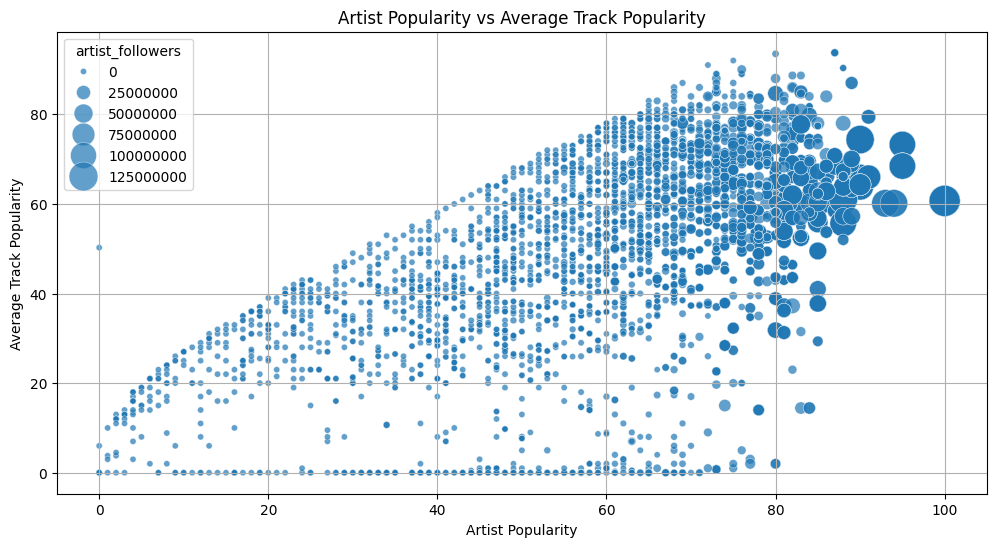

In [25]:
artist_avg_track_pop = df.groupby('artist_name')['track_popularity'].mean().reset_index()
artist_avg_track_pop = artist_avg_track_pop.rename(columns={'track_popularity': 'avg_track_popularity'})

artist_info = df[['artist_name', 'artist_popularity', 'artist_followers']].drop_duplicates()
artist_pop = artist_avg_track_pop.merge(artist_info, on='artist_name', how='left')

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=artist_pop, 
    x='artist_popularity', 
    y='avg_track_popularity',
    size='artist_followers',   # optional: size by followers
    alpha=0.7,
    sizes=(20, 500)
)
plt.title('Artist Popularity vs Average Track Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Average Track Popularity')
plt.grid(True)
plt.show()

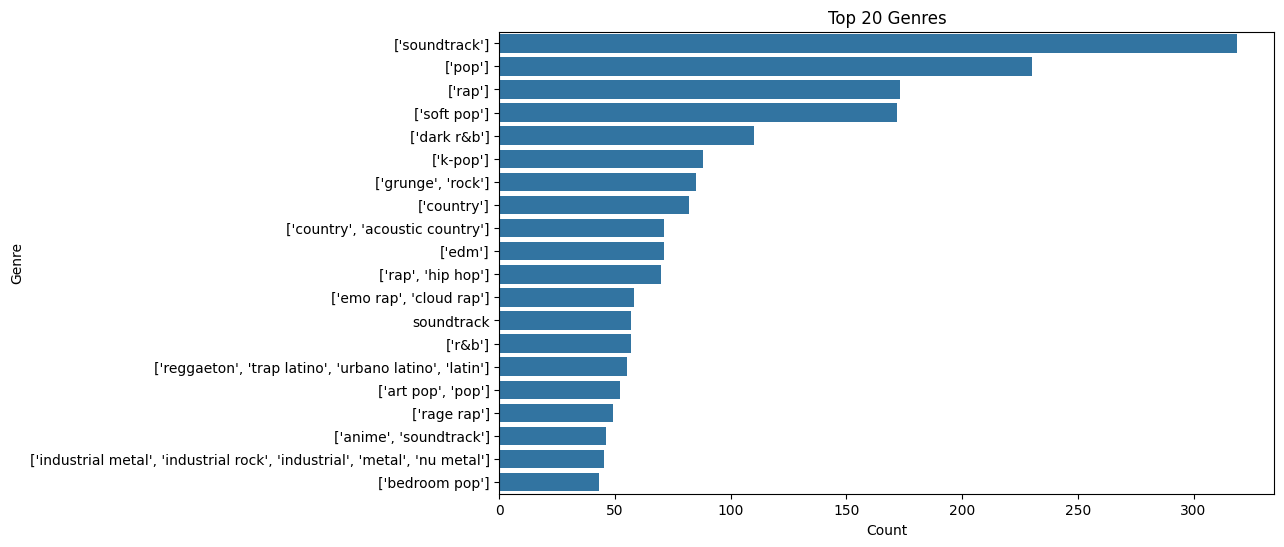

In [28]:
all_genres = df['artist_genres'].explode()

all_genres = all_genres[all_genres.notna()]  # remove NaN
all_genres = all_genres[all_genres != '[]']  # remove literal "[]"

top_genres = Counter(all_genres).most_common(20)

plt.figure(figsize=(10,6))
sns.barplot(x=[g[1] for g in top_genres], y=[g[0] for g in top_genres])
plt.title('Top 20 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

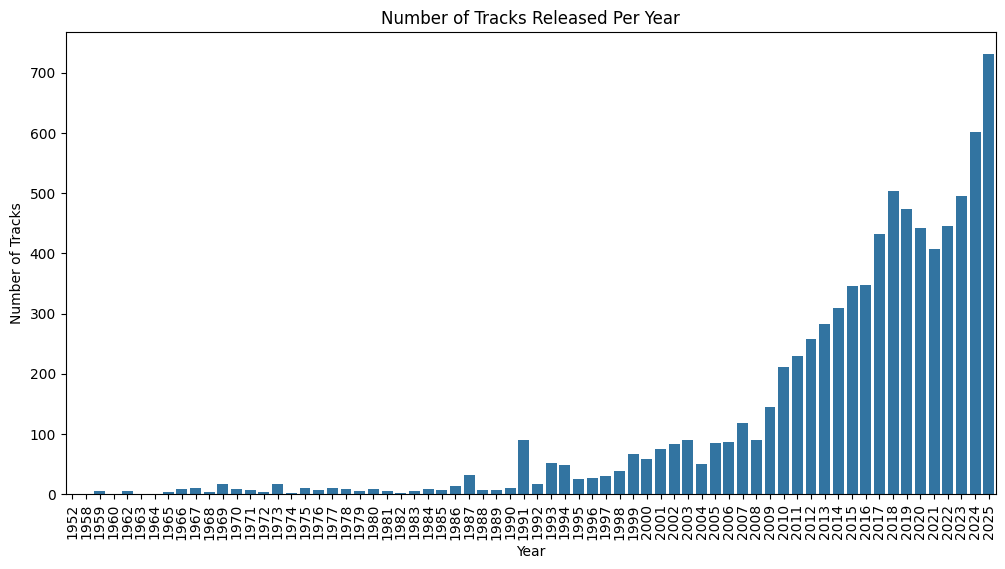

In [33]:
df['release_year'] = df['album_release_date'].dt.year

tracks_per_year = df.groupby('release_year')['track_id'].count().reset_index()
tracks_per_year = tracks_per_year.rename(columns={'track_id': 'num_tracks'})

plt.figure(figsize=(12,6))
sns.barplot(data=tracks_per_year, x='release_year', y='num_tracks')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)
plt.show()

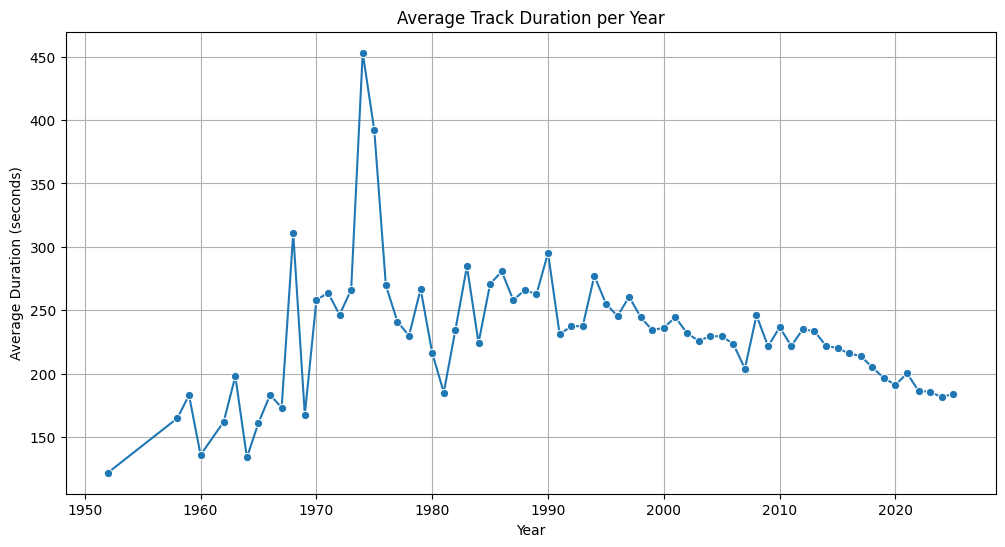

In [34]:
df['release_year'] = df['album_release_date'].dt.year

avg_duration_per_year = df.groupby('release_year')['track_duration_sec'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_duration_per_year, x='release_year', y='track_duration_sec', marker='o')
plt.title('Average Track Duration per Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.grid(True)
plt.show()

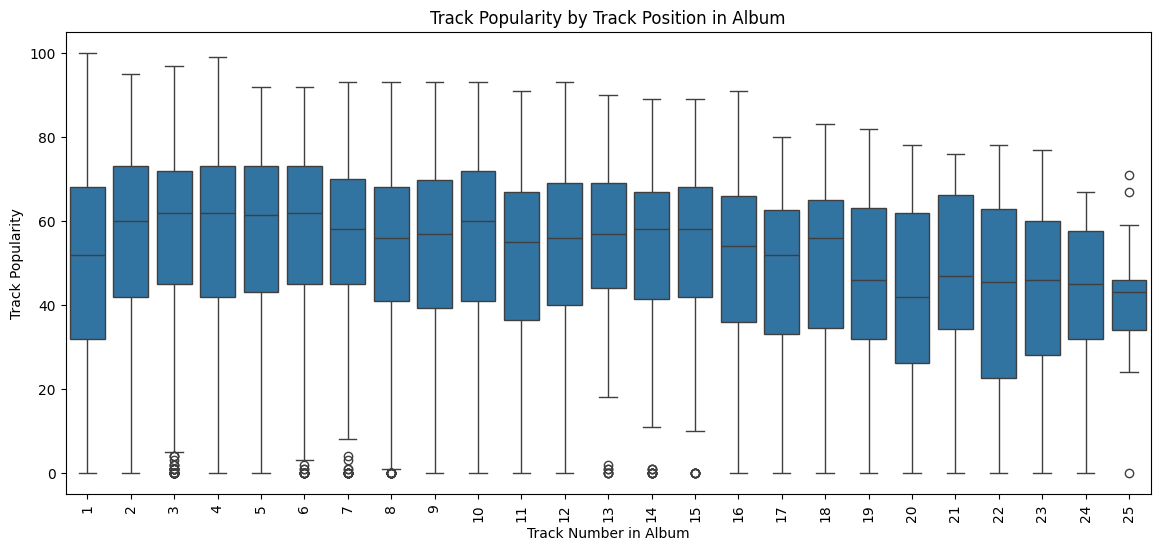

In [37]:
df_filtered = df[df['track_number'] <= 25]

plt.figure(figsize=(14,6))
sns.boxplot(data=df_filtered, x='track_number', y='track_popularity')
plt.title('Track Popularity by Track Position in Album')
plt.xlabel('Track Number in Album')
plt.ylabel('Track Popularity')
plt.xticks(rotation=90)  # rotate x-axis if album has many tracks
plt.show()